In [1]:
#Import libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from collections import Counter
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reads file with text and adds it to a list
med_list = []
with open("/home/ricardo/R/datasets/med/med.txt") as file:
    for line in file:
        med_list.append(line.split())

In [3]:
#A little bit of organizing, removes one character element, removes commas and dots at the end of words and
# goes lowercase
clean_list = []
for sublist in med_list:
    for elem in sublist:
        if len(elem) > 1:
            elem = elem.replace(',','')
            elem = elem.replace('.','')
            clean_list.append(elem.lower())

In [26]:
#Not elegant way of adding patients and patient as same:
final_list = []
for elem in clean_list: 
    if elem == "patients":
        elem = "patient"
    final_list.append(elem)

In [27]:
#Set of stopwords
s=set(stopwords.words('english'))

In [28]:
#Removes stopwords
without_stopwords = list(filter(lambda x: not x in s, final_list))

In [29]:
#Dictionary of Word count
dict_med = Counter(without_stopwords)

In [30]:
#Number of unique words (already excluded stopwords)
len(dict_med)

295

In [31]:
#Just checking if it makes sense
print(dict_med)

Counter({'students': 12, 'informatics': 10, 'medicine': 10, 'course': 10, 'clinical': 8, 'biomedical': 8, 'information': 8, 'patient': 8, 'data': 7, 'health': 7, 'care': 4, 'methods': 4, 'area': 3, 'new': 3, 'molecular': 3, 'analysis': 3, 'integration': 3, 'requirements': 3, 'units': 3, 'practice': 3, 'curriculum': 3, 'technology': 3, 'knowledge': 3, 'goals': 2, 'data-driven': 2, 'within': 2, 'scholarly': 2, 'concentration': 2, 'explores': 2, 'big': 2, 'enabling': 2, 'precision': 2, 'medical': 2, 'iddm': 2, 'provide': 2, 'topics': 2, 'management': 2, 'research': 2, 'biological': 2, 'classes': 2, 'graduate': 2, 'take': 2, 'fulfill': 2, 'degree': 2, 'introduction': 2, 'quantitative': 2, 'introduce': 2, 'applying': 2, 'matlab': 2, 'problem': 2, 'sets': 2, 'diagnostic': 2, 'bioinformatics': 2, 'laboratory': 2, 'tools': 2, 'effective': 2, 'safety': 2, 'best': 2, 'outcomes': 2, 'field': 2, 'improve': 2, 'thread': 2, 'major': 2, 'year': 2, 'digital': 2, 'applications': 2, 'center': 2, 'system

In [32]:
#Only words with a hit count higher than 3
new_dict = {}
for key in dict_med:
    if dict_med[key]>3:
        new_dict[key] = dict_med[key]

In [33]:
print(new_dict)

{'informatics': 10, 'medicine': 10, 'data': 7, 'clinical': 8, 'biomedical': 8, 'care': 4, 'students': 12, 'information': 8, 'methods': 4, 'course': 10, 'health': 7, 'patient': 8}


In [34]:
#Generates dataframe
words_df = pd.DataFrame(list(new_dict.items()), columns=['word', 'wordscount'])

In [35]:
words_df

,word,wordscount
0,informatics,10
1,medicine,10
2,data,7
3,clinical,8
4,biomedical,8
5,care,4
6,students,12
7,information,8
8,methods,4
9,course,10


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

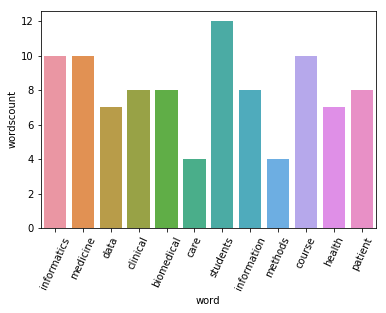

In [36]:
#Finally, plot chart
g = sns.barplot(x="word", y="wordscount", data=words_df);
plt.xticks(rotation = 65)

In [38]:
#Yes, I needed a wordcloud
from wordcloud import WordCloud
from PIL import Image

In [39]:
wc = WordCloud().generate_from_frequencies(dict_med)

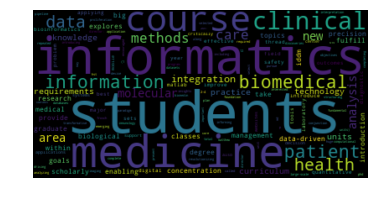

In [40]:
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()